## Linear Regression vs. Ridge Regression

In [1]:
# imports
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# Generate synthetic regression data
X, y = make_regression(n_samples=100, n_features=1, noise=20, random_state=42)

X.shape, y.shape

((100, 1), (100,))

In [3]:
# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [4]:
# Train a simple Linear Regression model
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

In [5]:
# Train a Ridge Regression model
ridge = Ridge(alpha=10)  # Alpha controls regularization strength
ridge.fit(X_train, y_train)
y_pred_ridge = ridge.predict(X_test)

In [6]:
# Evaluate models
mse_lr = mean_squared_error(y_test, y_pred_lr)
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
r2_lr = r2_score(y_test, y_pred_lr)
r2_ridge = r2_score(y_test, y_pred_ridge)

In [7]:
print(f"Linear Regression - MSE: {mse_lr:.2f}, R2 Score: {r2_lr:.2f}")
print(f"Ridge Regression - MSE: {mse_ridge:.2f}, R2 Score: {r2_ridge:.2f}")

Linear Regression - MSE: 416.81, R2 Score: 0.80
Ridge Regression - MSE: 470.85, R2 Score: 0.78


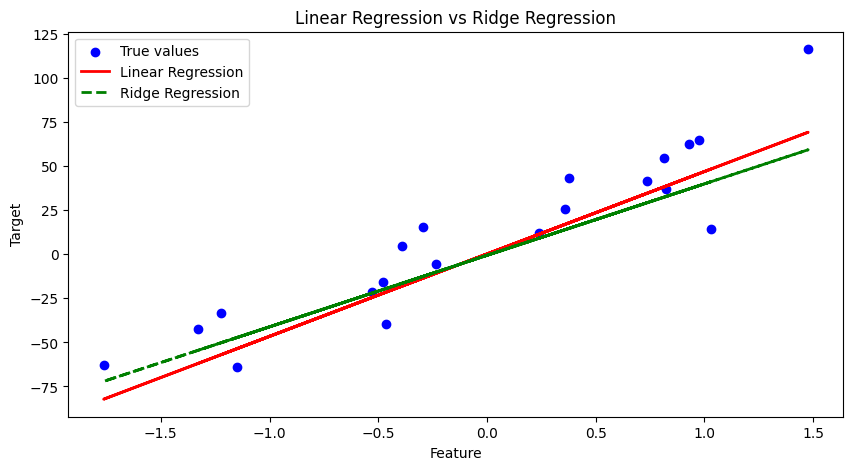

In [8]:
# Plot results
plt.figure(figsize=(10,5))
plt.scatter(X_test, y_test, color='blue', label='True values')
plt.plot(X_test, y_pred_lr, color='red', label='Linear Regression', linewidth=2)
plt.plot(X_test, y_pred_ridge, color='green', linestyle='dashed', label='Ridge Regression', linewidth=2)
plt.legend()
plt.title("Linear Regression vs Ridge Regression")
plt.xlabel("Feature")
plt.ylabel("Target")
plt.show()